In [1]:
# import torch
# from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration
# from datasets import load_dataset

# model = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-medium-mustc-multilingual-st")
# processor = Speech2TextProcessor.from_pretrained("facebook/s2t-medium-mustc-multilingual-st")

# ds = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")



In [1]:
import torch
from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration
from datasets import load_dataset

model = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")


ds = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")



/home/ubuntu/speech_transcribtion/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of Speech2TextForConditionalGeneration were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr and are newly initialized: ['model.decoder.embed_positions.weights', 'model.encoder.embed_positions.weights']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ubuntu/speech_transcribtion/venv/lib/python3.10/site-packages/datasets/load.py:1429: FutureWarning: The repository for hf-internal-testing/librispeech_asr_demo contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hf-internal-testing/librispeech_asr_demo
You can avoid this mes

In [2]:
ds

Dataset({
    features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
    num_rows: 73
})

In [3]:
ds['audio'][0]

{'path': '/home/ubuntu/.cache/huggingface/datasets/downloads/extracted/34789e5de9eaef2bab48fe13d634e8e553cb3353c3451fe594bbeb91c420eacd/dev_clean/1272/128104/1272-128104-0000.flac',
 'array': array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
        0.0010376 ]),
 'sampling_rate': 16000}

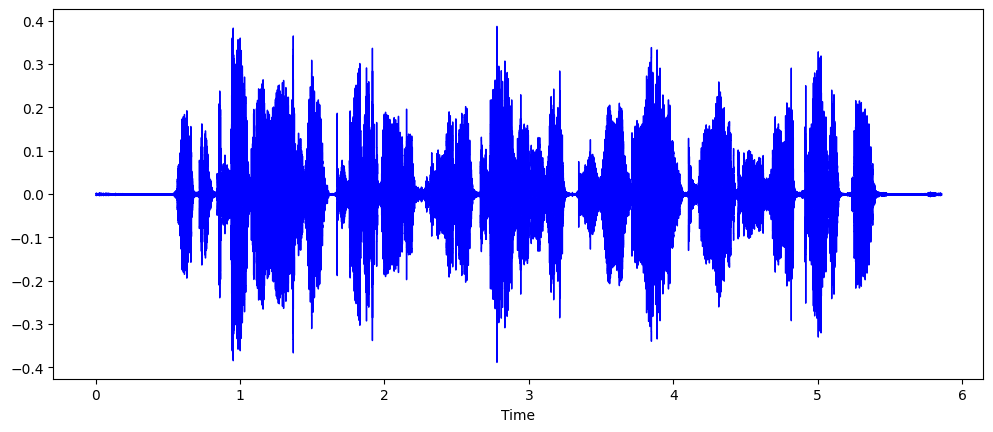

In [13]:
def gen_audio():
    audio = ds['audio'][0]
    return (
        audio["sampling_rate"],
        audio["array"],
    )
    
    
import librosa
import matplotlib.pyplot as plt
import librosa.display

sampling_rate, array= gen_audio()

array, sampling_rate

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate,  color="blue")


In [5]:
for i in range(10):
    print(
        ds['text'][i]
    )

MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL
NOR IS MISTER QUILTER'S MANNER LESS INTERESTING THAN HIS MATTER
HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMAS AND ROAST BEEF LOOMING BEFORE US SIMILES DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND
HE HAS GRAVE DOUBTS WHETHER SIR FREDERICK LEIGHTON'S WORK IS REALLY GREEK AFTER ALL AND CAN DISCOVER IN IT BUT LITTLE OF ROCKY ITHACA
LINNELL'S PICTURES ARE A SORT OF UP GUARDS AND AT EM PAINTINGS AND MASON'S EXQUISITE IDYLLS ARE AS NATIONAL AS A JINGO POEM MISTER BIRKET FOSTER'S LANDSCAPES SMILE AT ONE MUCH IN THE SAME WAY THAT MISTER CARKER USED TO FLASH HIS TEETH AND MISTER JOHN COLLIER GIVES HIS SITTER A CHEERFUL SLAP ON THE BACK BEFORE HE SAYS LIKE A SHAMPOOER IN A TURKISH BATH NEXT MAN
IT IS OBVIOUSLY UNNECESSARY FOR US TO POINT OUT HOW LUMINOUS THESE CRITICISMS ARE HOW DELICATE IN EXPRESSION
ON THE GENERAL PRINCIPLES OF ART MISTER QUILTER WRITES WITH EQUAL L

In [9]:
import gradio as gr


def generate_audio():
    audio = ds['audio'][0]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), "audio-0"
    


with gr.Blocks() as demo:
    with gr.Column():
        audio, label = generate_audio()
        output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/home/ubuntu/speech_transcribtion/venv/lib/python3.10/site-packages/gradio/processing_utils.py:340: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [6]:
# ds.save_to_disk("hf-internal-testing/librispeech_asr_demo.pt")

Saving the dataset (1/1 shards): 100%|██████████| 73/73 [00:00<00:00, 1800.18 examples/s]


In [8]:
inputs = processor(ds[0]["audio"]["array"], sampling_rate=ds[0]["audio"]["sampling_rate"], return_tensors="pt")
generated_ids = model.generate(inputs["input_features"], attention_mask=inputs["attention_mask"])

transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)
transcription

['mister quilter is the apostle of the middle classes and we are glad to welcome his gospel']

In [7]:
# inputs = processor(ds[0]["audio"]["array"], sampling_rate=ds[0]["audio"]["sampling_rate"], return_tensors="pt")
# generated_ids = model.generate(
#     inputs["input_features"],
#     attention_mask=inputs["attention_mask"],
#     forced_bos_token_id=processor.tokenizer.lang_code_to_id["en"],
# )

# translation = processor.batch_decode(generated_ids, skip_special_tokens=True)
# translation

In [15]:
processor.tokenizer.lang_code_to_id

{'pt': 4, 'fr': 5, 'ru': 6, 'nl': 7, 'ro': 8, 'it': 9, 'es': 10, 'de': 11}